In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier



In [3]:
df = pd.read_excel('C:/Users/hp/Desktop/attachments(1)/default of credit card clients.xls',sheet_name='Sheet1')

In [4]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
df.shape

(30000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default payment next month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


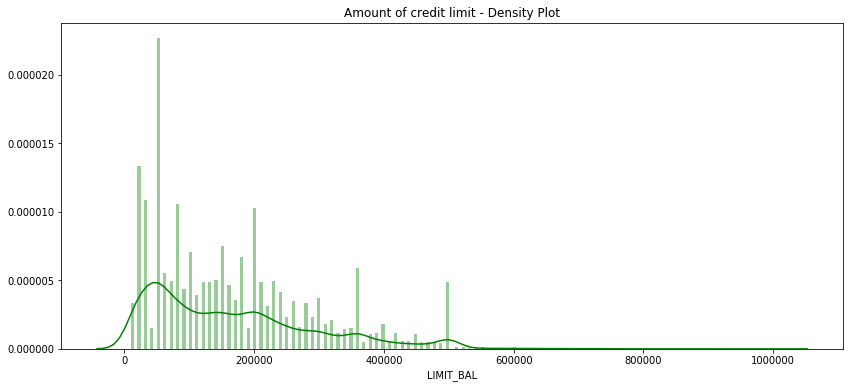

In [9]:

plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="green")
plt.show()

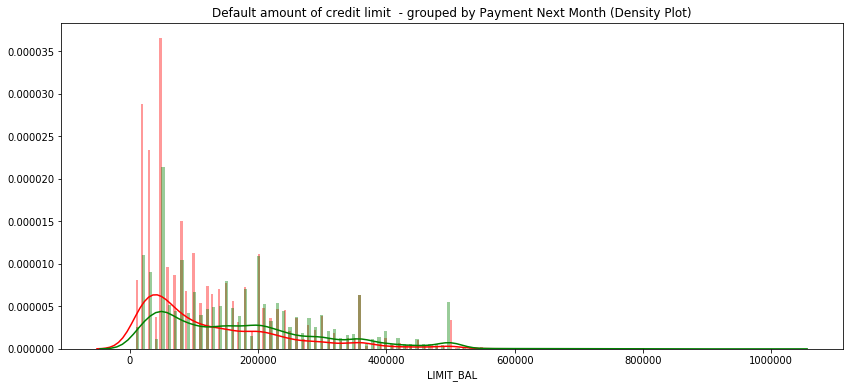

In [10]:
class_0 = df.loc[df['default payment next month'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default payment next month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

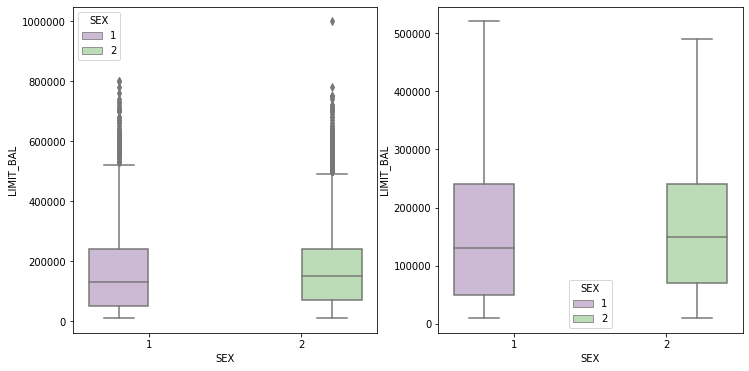

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show();

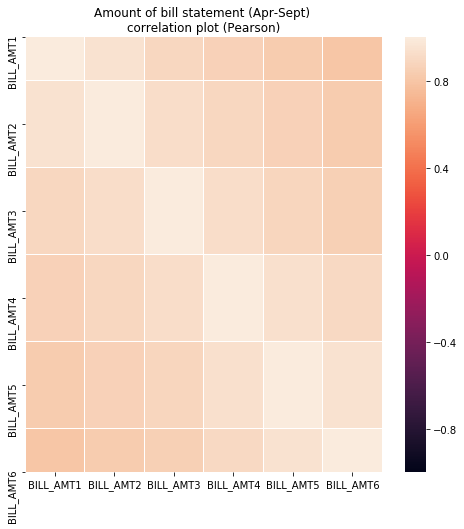

In [12]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

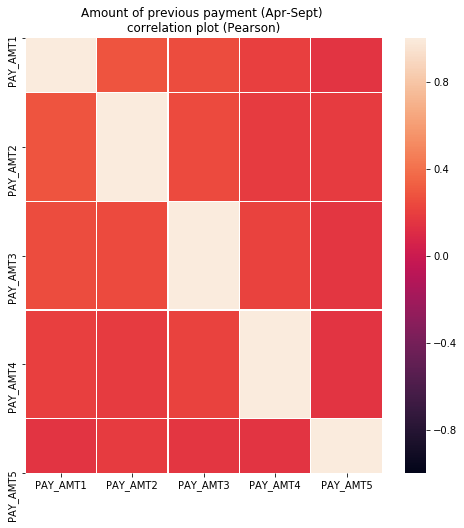

In [13]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

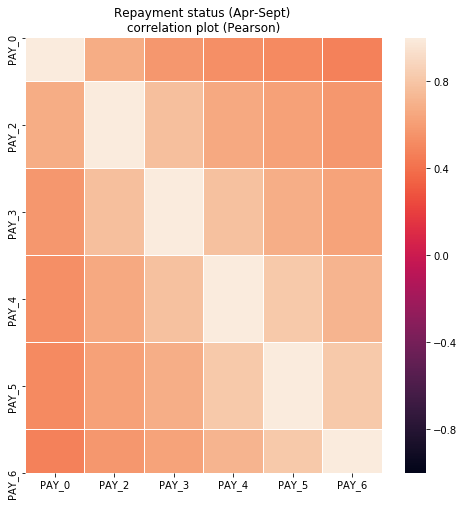

In [14]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

In [15]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

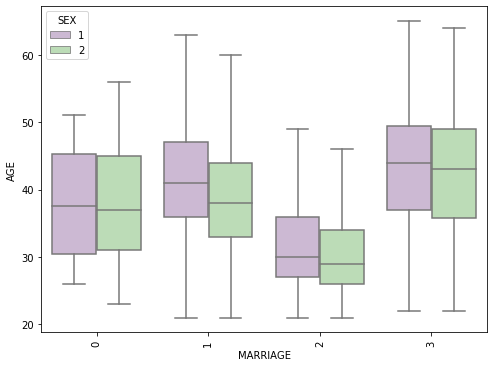

In [16]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

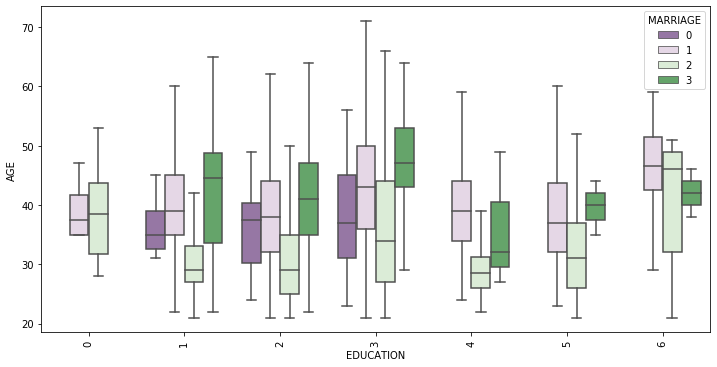

In [17]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

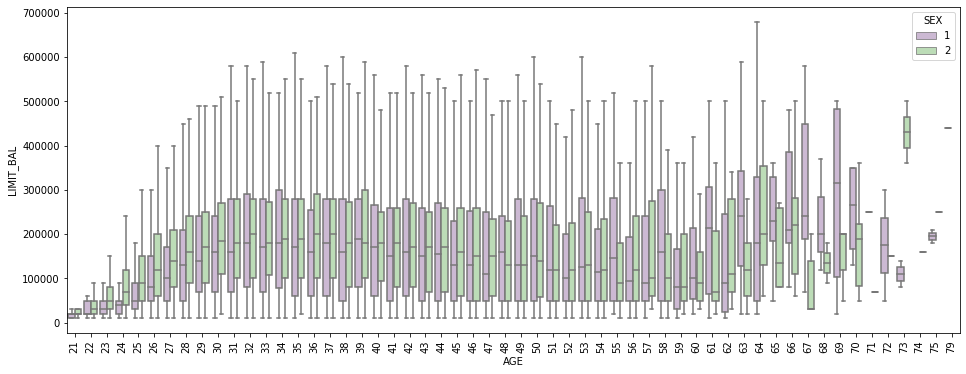

In [18]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

In [19]:
df['LIMIT_BAL'].value_counts().shape


(81,)

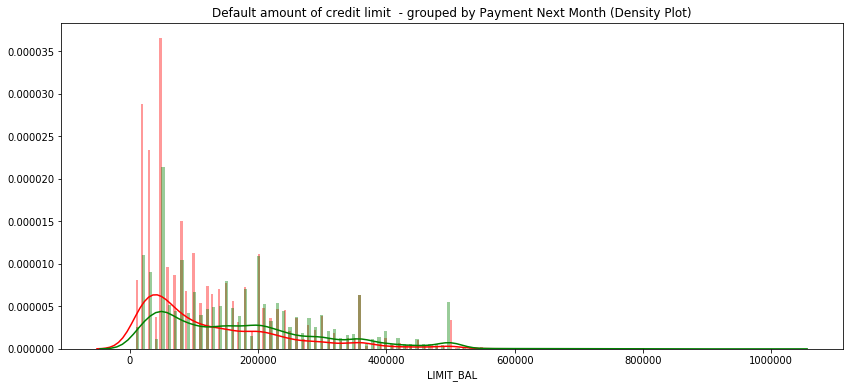

In [20]:
class_0 = df.loc[df['default payment next month'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default payment next month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

In [25]:
tmp = pd.DataFrame({'Feature': X, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


NameError: name 'clf' is not defined

In [22]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [23]:
X= df.drop(['default payment next month'],axis=1)

In [24]:
Y = df['default payment next month']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(x_train,y_train)

C:\Users\hp\.anaconda\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
print(log.coef_)
print(log.intercept_)

[[-2.56276029e-05 -3.72133619e-06 -1.89986803e-06 -2.10158976e-06
  -2.03982096e-06 -2.61794903e-05  4.87172225e-06  3.97522734e-06
   3.50371962e-06  3.17192512e-06  2.90249606e-06  2.73610185e-06
  -1.19463590e-05  5.46394277e-06  3.23790786e-06  4.58995615e-06
   1.58079966e-06  1.82985480e-06 -3.85274142e-05 -2.17258028e-05
  -1.23077224e-05 -7.89597894e-06 -5.73449936e-06 -2.41312635e-06]]
[-9.70190048e-07]


In [29]:

predictions = log.predict(x_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
cmat=confusion_matrix(y_test,predictions)
reports = classification_report(y_test,predictions) 
Accuracy=accuracy_score(y_test,predictions)

In [31]:
print(cmat)

[[5868    0]
 [1631    1]]


In [32]:
print(reports)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5868
           1       1.00      0.00      0.00      1632

    accuracy                           0.78      7500
   macro avg       0.89      0.50      0.44      7500
weighted avg       0.83      0.78      0.69      7500



In [33]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
predictions = tree.predict(x_test)
predictions

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
cmat=confusion_matrix(y_test,predictions)
reports = classification_report(y_test,predictions,digits=3) 
Accuracy=accuracy_score(y_test,predictions)

In [36]:
cmat

array([[5594,  274],
       [1051,  581]], dtype=int64)

In [37]:
print(reports)

              precision    recall  f1-score   support

           0      0.842     0.953     0.894      5868
           1      0.680     0.356     0.467      1632

    accuracy                          0.823      7500
   macro avg      0.761     0.655     0.681      7500
weighted avg      0.807     0.823     0.801      7500



In [38]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

predictions=clf.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
cmat=confusion_matrix(y_test,predictions)
reports = classification_report(y_test,predictions,digits=3) 
Accuracy=accuracy_score(y_test,predictions)

In [40]:
cmat

array([[5552,  316],
       [1030,  602]], dtype=int64)

In [41]:
print(reports)

              precision    recall  f1-score   support

           0      0.844     0.946     0.892      5868
           1      0.656     0.369     0.472      1632

    accuracy                          0.821      7500
   macro avg      0.750     0.658     0.682      7500
weighted avg      0.803     0.821     0.801      7500



In [42]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 
  

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
predictions = gnb.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
cmat=confusion_matrix(y_test,predictions)
reports = classification_report(y_test,predictions) 
Accuracy=accuracy_score(y_test,predictions)

In [45]:
cmat

array([[1234, 4634],
       [ 162, 1470]], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
cmat=confusion_matrix(y_test,predictions)
reports = classification_report(y_test,predictions) 
Accuracy=accuracy_score(y_test,predictions)

In [47]:
print(reports)

              precision    recall  f1-score   support

           0       0.88      0.21      0.34      5868
           1       0.24      0.90      0.38      1632

    accuracy                           0.36      7500
   macro avg       0.56      0.56      0.36      7500
weighted avg       0.74      0.36      0.35      7500



In [48]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [49]:
predictions = model.predict(x_test)

NameError: name 'model' is not defined

In [50]:
print(reports)

              precision    recall  f1-score   support

           0       0.88      0.21      0.34      5868
           1       0.24      0.90      0.38      1632

    accuracy                           0.36      7500
   macro avg       0.56      0.56      0.36      7500
weighted avg       0.74      0.36      0.35      7500



In [51]:
cmat

array([[1234, 4634],
       [ 162, 1470]], dtype=int64)

In [52]:
model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.8, n_estimators=100, random_state=2018).fit(x_train, y_train)

In [53]:
predictions = model.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
cmat=confusion_matrix(y_test,predictions)
reports = classification_report(y_test,predictions) 
Accuracy=accuracy_score(y_test,predictions)

In [55]:
cmat

array([[5637,  231],
       [1112,  520]], dtype=int64)

In [56]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(x_train, x_train.values)
dvalid = xgb.DMatrix(x_test, y_test.values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(x_train, 'train'), (y_train, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'


In [58]:
print(reports)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5868
           1       0.69      0.32      0.44      1632

    accuracy                           0.82      7500
   macro avg       0.76      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500



In [ ]:
roc_auc_score(values, predictions)